# 1. Introduction

At Dataquest, we're huge believers in learning through doing, and we hope this shows in your experience with the missions. While missions focus on introducing concepts, challenges allow you to perform deliberate practice by completing structured problems. You can read more about deliberate practice on [Wikipedia](http://bit.ly/2cJ2Qt7) and at Nautilus. Challenges will feel similar to missions, but with little instructional material and a larger focus on exercises.

# 2. Life and Death of the Avengers

The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new Marvel Cinematic Universe.

Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the [Marvel Wikia site](http://marvel.wikia.com/wiki/Main_Page) further. To learn how they collected their data, which is available in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/avengers), read the write-up they published on the [FiveThirtyEight website](http://fivethirtyeight.com/features/avengers-death-comics-age-of-ultron/).

# 3. Exploring the Data

In [1]:
import pandas as pd

avengers = pd.read_csv('avengers.csv')
avengers.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


# 4. Filtering Out Bad Data

Because the data came from a crowdsourced community site, it could contain errors. If you plot a histogram of the values in the Year column, which describes the year Marvel introduced each Avenger, you'll immediately notice some oddities. For example, there are quite a few Avengers who look like they were introduced in 1900, which we know is a little fishy -- the Avengers weren't introduced in the comic series until the 1960's!

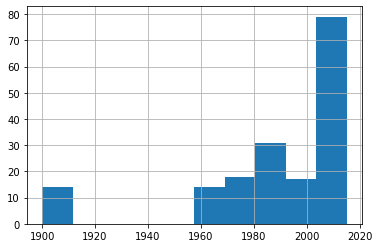

In [2]:
import matplotlib.pyplot as plt
true_avengers = pd.DataFrame()

avengers['Year'].hist()
true_avengers = avengers[avengers["Year"] > 1959]

# 5. Consolidating Deaths

We're interested in the total number of deaths each character experienced, so we'd like to have a single field containing that information. Right now, there are five fields (Death1 to Death5), each of which contains a binary value representing whether a superhero experienced that death or not. For example, a superhero could experience Death1, then Death2, and so on until the writers decided not to bring the character back to life.

In [3]:
pd.set_option('mode.chained_assignment', None)

def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

# 6. Verifying Years Since Joining

For our final task, we want to verify that the Years since joining field accurately reflects the Year column. For example, if an Avenger was introduced in the Year 1960, is the Years since joining value for that Avenger 55?

In [4]:
joined_accuracy_count  = int()
correct_joined_years = true_avengers[true_avengers['Years since joining'] == (2015 - true_avengers['Year'])]
joined_accuracy_count = len(correct_joined_years)